### Project Proposal Code
### Jackson Ward
### 4/3/25

In [47]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

# Setup headless browser
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # run without opening browser
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Go directly to your final BEA GDP data page
url = "https://apps.bea.gov/iTable/?reqid=70&step=1#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyOSwyNSwzMSwyNiwyNywzMF0sImRhdGEiOltbIlRhYmxlSWQiLCI2MDAiXSxbIk1ham9yX0FyZWEiLCIwIl0sWyJTdGF0ZSIsWyIwIl1dLFsiQXJlYSIsWyIxOTAwMCJdXSxbIlN0YXRpc3RpYyIsWyIxIl1dLFsiVW5pdF9vZl9tZWFzdXJlIiwiTGV2ZWxzIl0sWyJZZWFyIixbIi0xIl1dLFsiWWVhckJlZ2luIiwiLTEiXSxbIlllYXJfRW5kIiwiLTEiXV19"
driver.get(url)

# Wait for the GDP data cells to appear
try:
    WebDriverWait(driver, 20).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "td.NormalStyle.p0"))
    )
except:
    print("Timeout: GDP table did not load.")
    driver.quit()
    raise

# Scrape GDP values
gdp_elements = driver.find_elements(By.CSS_SELECTOR, "td.NormalStyle.p0")

# Parse and clean
gdp_values = []
for el in gdp_elements:
    text = el.text.strip().replace(",", "")
    try:
        gdp_values.append(float(text))
    except ValueError:
        continue  # Skip if it's not a number

driver.quit()

# Create year column (assuming it's 1997 onward — BEA GDP series usually starts there)
start_year = 1997
years = list(range(start_year, start_year + len(gdp_values)))

# Build DataFrame
gdp_df = pd.DataFrame({
    "Year": years,
    "Iowa_GDP": gdp_values
})

print(gdp_df)

    Year  Iowa_GDP
0   1997   19000.0
1   1998  121031.0
2   1999  123683.4
3   2000  129323.4
4   2001  128077.5
5   2002  131035.2
6   2003  137476.9
7   2004  149063.2
8   2005  153626.8
9   2006  155704.5
10  2007  162838.1
11  2008  160469.1
12  2009  156737.2
13  2010  161593.1
14  2011  164559.3
15  2012  170923.7
16  2013  171069.1
17  2014  180309.9
18  2015  185989.2
19  2016  186729.9
20  2017  187125.0
21  2018  189245.1
22  2019  188471.4
23  2020  186328.2
24  2021  201147.1
25  2022  201580.4
26  2023  202051.4
27  2024  201096.8


In [49]:
economic_df = pd.read_csv('Iowa_Economic_Indicators.csv')

# Check the first few rows of the CSV
print(economic_df)

        Month  Iowa Leading Indicator Index  Avg Weekly Manufacturing Hours  \
0    Jan 1999                         99.77                           41.83   
1    Feb 1999                         99.59                           41.68   
2    Mar 1999                         99.88                           41.58   
3    Apr 1999                        100.05                           41.60   
4    May 1999                        100.02                           41.53   
..        ...                           ...                             ...   
307  Aug 2024                        104.80                           40.33   
308  Sep 2024                        105.41                           40.47   
309  Oct 2024                        105.80                           40.55   
310  Nov 2024                        106.30                           40.62   
311  Dec 2024                        106.29                           40.68   

     Residential Building Permits  New Orders Index

In [51]:
# Step 1: Extract the year from the 'Month' column in the monthly data
economic_df['Year'] = pd.to_datetime(economic_df['Month'], format='%b %Y').dt.year

# Step 2: Merge the monthly data with the GDP data based on the 'Year' column
df_combined = pd.merge(economic_df, gdp_df[['Year', 'Iowa_GDP']], on='Year', how='left')

In [53]:
df_combined

,Month,Iowa Leading Indicator Index,Avg Weekly Manufacturing Hours,Residential Building Permits,New Orders Index,Avg Weekly Unemployment Claims,Yield Spread,Diesel Fuel Consumption (Gallons),Iowa Stock Market Index,Agricultural Futures Profits Index,Non-Farm Employment Coincident Index,Corn Profits,Soybean Profits,Cattle Profits,Hog Profits,1 Month Diffusion Index,6 Month Diffusion Index,Year,Iowa_GDP
0,Jan 1999,99.77,41.83,1136,52.4,2768,0.27,44828906.00,39.20,3.24,99.11,61.43,201.83,6.69,25.50,NaN,NaN,1999,123683.4
1,Feb 1999,99.59,41.68,1123,51.0,2765,0.44,44737672.83,37.65,2.92,99.28,57.40,185.72,15.01,26.32,50.00,NaN,1999,123683.4
2,Mar 1999,99.88,41.58,1146,51.1,2768,0.66,45145275.50,38.87,0.38,99.47,53.96,170.82,20.25,25.21,75.00,NaN,1999,123683.4
3,Apr 1999,100.05,41.60,1158,50.7,2806,0.77,45302449.83,41.06,-0.53,99.67,51.02,158.15,20.44,25.43,56.25,NaN,1999,123683.4
4,May 1999,100.02,41.53,1131,51.5,2894,0.91,45501298.75,42.34,-2.00,99.83,48.39,143.74,18.56,24.93,50.00,NaN,1999,123683.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Aug 2024,104.80,40.33,917,49.0,2500,-1.43,64236941.83,129.08,0.63,110.01,-10.97,-56.00,16.94,28.53,37.50,37.50,2024,201096.8
308,Sep 2024,105.41,40.47,946,48.4,2535,-1.20,65405104.25,133.77,-0.27,110.08,-15.45,-70.30,16.54,29.58,62.50,50.00,2024,201096.8
309,Oct 2024,105.80,40.55,971,48.9,2549,-0.62,65042278.17,141.57,-0.06,110.09,-20.10,-82.31,16.73,30.56,62.50,68.75,2024,201096.8
310,Nov 2024,106.30,40.62,1015,48.8,2561,-0.26,65118376.08,154.12,0.12,110.11,-22.40,-94.30,15.68,31.97,75.00,75.00,2024,201096.8


In [81]:
print(df_combined.columns)

Index(['Month', 'Iowa Leading Indicator Index',
       'Avg Weekly Manufacturing Hours', 'Residential Building Permits',
       'New Orders Index', 'Avg Weekly Unemployment Claims', 'Yield Spread',
       'Diesel Fuel Consumption (Gallons)', 'Iowa Stock Market Index',
       'Agricultural Futures Profits Index',
       'Non-Farm Employment Coincident Index', 'Corn Profits',
       'Soybean Profits', 'Cattle Profits', 'Hog Profits',
       '1 Month Diffusion Index', '6 Month Diffusion Index', 'Year',
       'Iowa_GDP'],
      dtype='object')


# Question 1: What is the relationship between the Iowa Leading Indicator Index and Iowa’s GDP growth?

In [84]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [86]:
df_pearson = df_combined.dropna(subset=['Iowa Leading Indicator Index','Iowa_GDP'])

corr_coef, p_value = pearsonr(df_pearson['Iowa Leading Indicator Index'], df_pearson['Iowa_GDP'])

print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_value:.4g}")

Pearson Correlation Coefficient: 0.8005
P-value: 6.975e-71


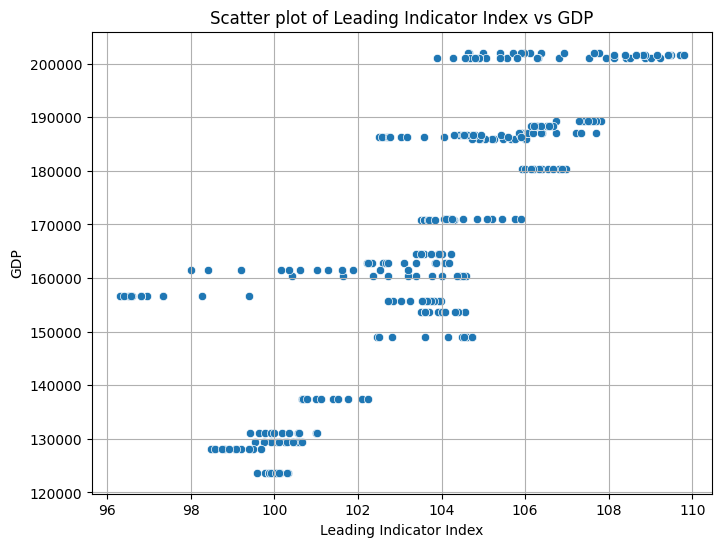

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Iowa Leading Indicator Index', y='Iowa_GDP', data=df_pearson)
plt.title('Scatter plot of Leading Indicator Index vs GDP')
plt.xlabel('Leading Indicator Index')
plt.ylabel('GDP')
plt.grid(True)
plt.show()

Yearly Pearson Correlation Coefficient: 0.8275
Yearly P-value: 1.842e-07


/var/folders/f4/1z7x09bd16gdrqpbmbvn_48h0000gn/T/ipykernel_88484/1780636970.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_combined['Year'] = pd.to_datetime(df_combined['Month']).dt.year


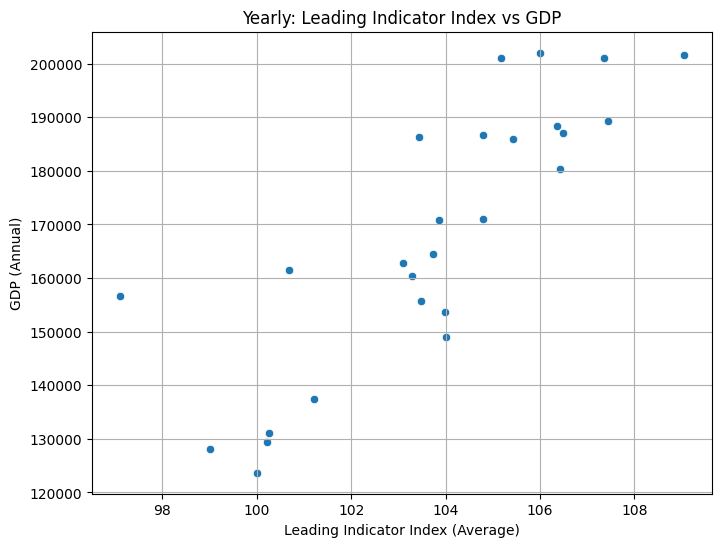

In [90]:
df_combined['Year'] = pd.to_datetime(df_combined['Month']).dt.year

yearly_df = df_combined.groupby('Year').agg({
    'Iowa Leading Indicator Index': 'mean',
    'Iowa_GDP': 'mean'
}).reset_index()

# Now re-run the correlation and plot
from scipy.stats import pearsonr

yearly_df_clean = yearly_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Iowa Leading Indicator Index', 'Iowa_GDP'])


corr_coef, p_value = pearsonr(yearly_df_clean['Iowa Leading Indicator Index'], yearly_df_clean['Iowa_GDP'])
print(f"Yearly Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"Yearly P-value: {p_value:.4g}")

# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x='Iowa Leading Indicator Index', y='Iowa_GDP', data=yearly_df)
plt.title('Yearly: Leading Indicator Index vs GDP')
plt.xlabel('Leading Indicator Index (Average)')
plt.ylabel('GDP (Annual)')
plt.grid(True)
plt.show()

# Machine Learning attempt

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [104]:
#binary target — 1 if GDP > median, else 0
median_gdp = yearly_df_clean['Iowa_GDP'].mean()
yearly_df_clean['GDP_High'] = (yearly_df_clean['Iowa_GDP'] > median_gdp).astype(int)

# Features (X) and Target (y)
X = yearly_df_clean[['Iowa Leading Indicator Index']]  # Features
y = yearly_df_clean['GDP_High']  

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Cross validated logistic regression represents a consistant accuracy within the model, repressenting a highly likely positive relationship between Leading Indicator Index and GDP

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validated accuracy scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validated accuracy scores: [0.83333333 0.8        0.8        0.8        1.        ]
Average accuracy: 0.8466666666666667


In [110]:
print(yearly_df_clean.columns)

Index(['Year', 'Iowa Leading Indicator Index', 'Iowa_GDP', 'GDP_High'], dtype='object')


### Scatter Matrix depicting the positive, relatively strongly connected relationship between Iowa Leading Indicator Index and High GDP

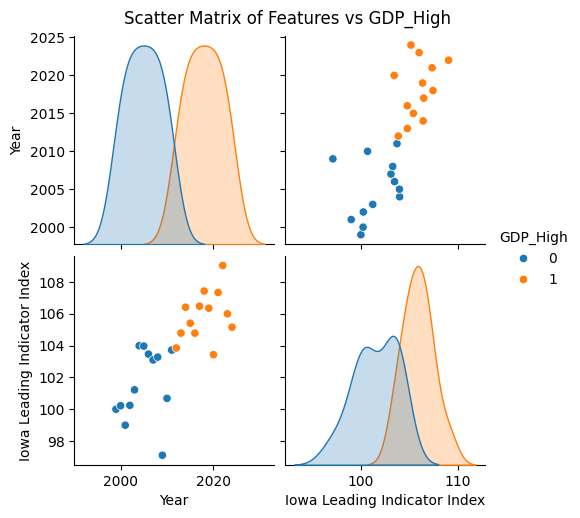

In [112]:
features = ['Year','Iowa Leading Indicator Index','GDP_High']
sns.pairplot(yearly_df_clean[features], hue='GDP_High', diag_kind='kde')

plt.suptitle("Scatter Matrix of Features vs GDP_High", y=1.02)
plt.show()

### Further collection of scatter matrixes grouping features by Agriculture-Crops, Agriculture-Livestock, and General Industry

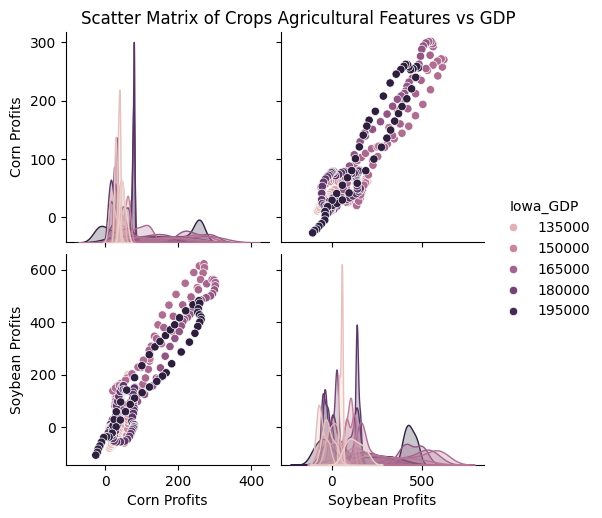

In [114]:
features = ['Corn Profits','Soybean Profits','Iowa_GDP']
sns.pairplot(df_combined[features], hue='Iowa_GDP', diag_kind='kde')

plt.suptitle("Scatter Matrix of Crops Agricultural Features vs GDP", y=1.02)
plt.show()

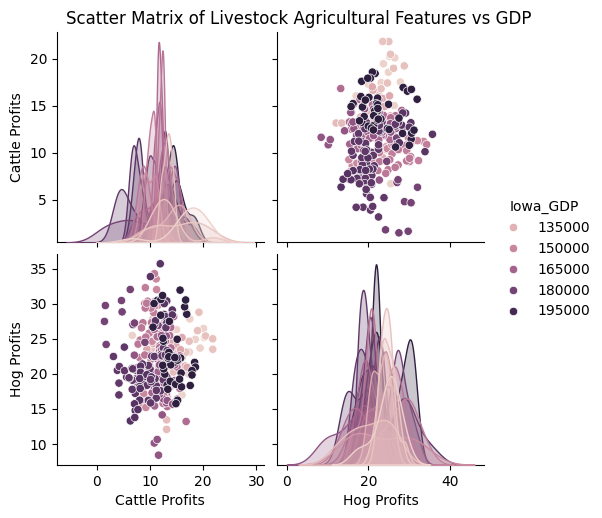

In [116]:
features = ['Cattle Profits', 'Hog Profits','Iowa_GDP']
sns.pairplot(df_combined[features], hue='Iowa_GDP', diag_kind='kde')

plt.suptitle("Scatter Matrix of Livestock Agricultural Features vs GDP", y=1.02)
plt.show()

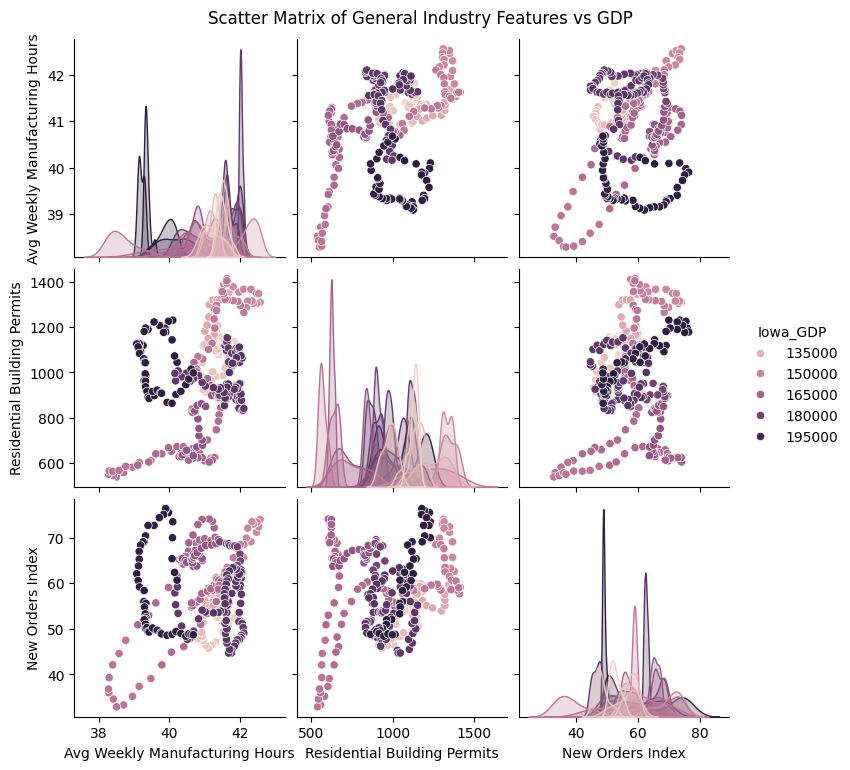

In [118]:
features = ['Avg Weekly Manufacturing Hours', 'Residential Building Permits','New Orders Index','Iowa_GDP']
sns.pairplot(df_combined[features], hue='Iowa_GDP', diag_kind='kde')

plt.suptitle("Scatter Matrix of General Industry Features vs GDP", y=1.02)
plt.show()

# Question 2: Impact of agricultural profits on Iowa's economic performance

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score

In [123]:
print(df_combined.columns)

Index(['Month', 'Iowa Leading Indicator Index',
       'Avg Weekly Manufacturing Hours', 'Residential Building Permits',
       'New Orders Index', 'Avg Weekly Unemployment Claims', 'Yield Spread',
       'Diesel Fuel Consumption (Gallons)', 'Iowa Stock Market Index',
       'Agricultural Futures Profits Index',
       'Non-Farm Employment Coincident Index', 'Corn Profits',
       'Soybean Profits', 'Cattle Profits', 'Hog Profits',
       '1 Month Diffusion Index', '6 Month Diffusion Index', 'Year',
       'Iowa_GDP'],
      dtype='object')


In [125]:
ag_cols = ['Cattle Profits', 'Hog Profits','Corn Profits', 'Soybean Profits']
livestock_cols = ['Cattle Profits', 'Hog Profits']
crop_cols = ['Corn Profits', 'Soybean Profits']

target_col = 'Iowa_GDP'

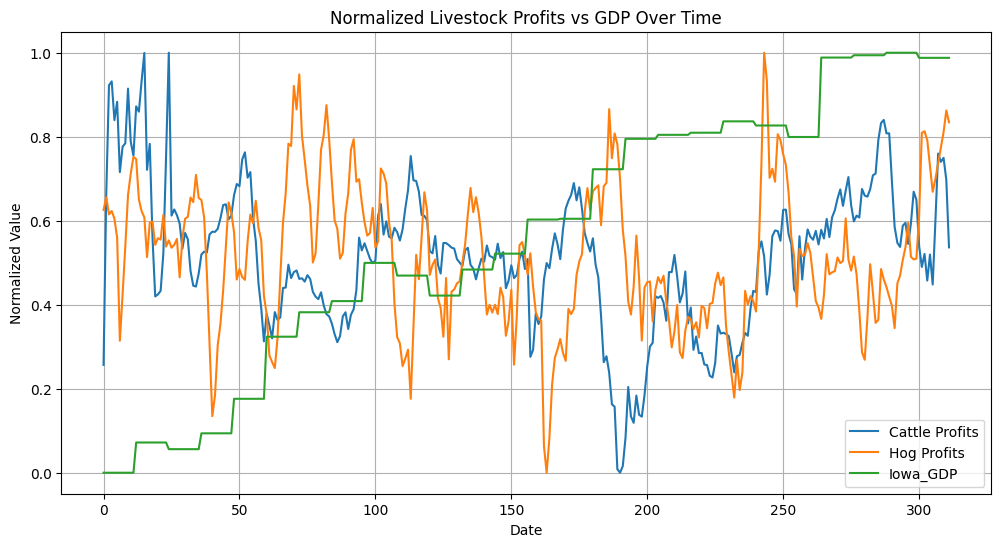

In [127]:
# Normalize data to 0–1 scale for visual comparison
normalized_df = df_combined[livestock_cols + [target_col]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot normalized data
normalized_df.plot(figsize=(12, 6))
plt.title("Normalized Livestock Profits vs GDP Over Time")
plt.ylabel("Normalized Value")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.show()

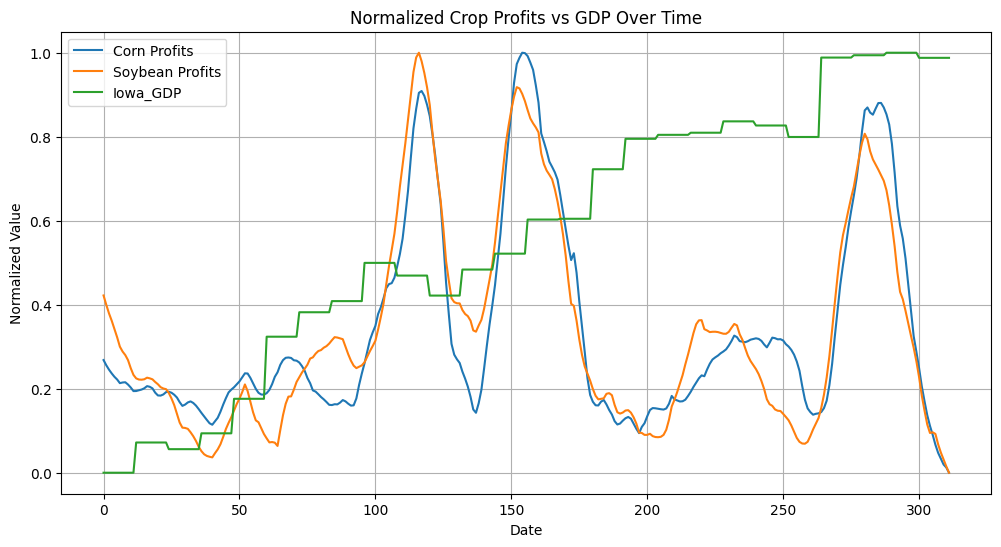

In [129]:
# Normalize data to 0–1 scale for visual comparison
normalized_df = df_combined[crop_cols + [target_col]].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot normalized data
normalized_df.plot(figsize=(12, 6))
plt.title("Normalized Crop Profits vs GDP Over Time")
plt.ylabel("Normalized Value")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.show()

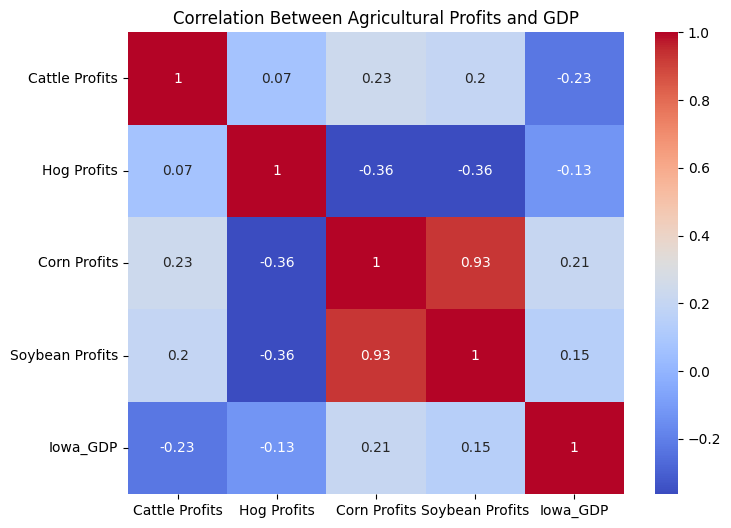

In [131]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df_combined[ag_cols + [target_col]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Agricultural Profits and GDP")
plt.show()

In [133]:
# Linear Regression
X = df_combined[ag_cols]
y = df_combined[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print("R^2 score on test set:", model.score(X_test, y_test))
print("Regression Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

R^2 score on test set: 0.2553059565097454
Regression Coefficients:
Cattle Profits: -1903.3346
Hog Profits: -138.6912
Corn Profits: 159.2555
Soybean Profits: -40.9986


### Because of relatively weak relationship, checking if features could match better when lagged.

In [136]:
# Create 1-month lag for each ag feature
for col in ag_cols:
    df_combined[f'{col}_lag1'] = df_combined[col].shift(1)

In [138]:
df_combined = df_combined.dropna()

In [140]:
# Use lagged features only
X = df_combined[[col for col in df_combined.columns if 'lag' in col]]
y = df_combined['Iowa_GDP']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))

R² Score: -57.137110525477475


# Question 3: Do economic indicators such as residential building permits and new orders correlate with monthly fluctuations in Iowa's GDP

In [143]:
df_combined.columns

Index(['Month', 'Iowa Leading Indicator Index',
       'Avg Weekly Manufacturing Hours', 'Residential Building Permits',
       'New Orders Index', 'Avg Weekly Unemployment Claims', 'Yield Spread',
       'Diesel Fuel Consumption (Gallons)', 'Iowa Stock Market Index',
       'Agricultural Futures Profits Index',
       'Non-Farm Employment Coincident Index', 'Corn Profits',
       'Soybean Profits', 'Cattle Profits', 'Hog Profits',
       '1 Month Diffusion Index', '6 Month Diffusion Index', 'Year',
       'Iowa_GDP', 'Cattle Profits_lag1', 'Hog Profits_lag1',
       'Corn Profits_lag1', 'Soybean Profits_lag1'],
      dtype='object')

In [145]:
industry_cols = ['Avg Weekly Manufacturing Hours', 'Residential Building Permits',
       'New Orders Index', 'Avg Weekly Unemployment Claims', 'Yield Spread',
       'Diesel Fuel Consumption (Gallons)', 'Iowa Stock Market Index']

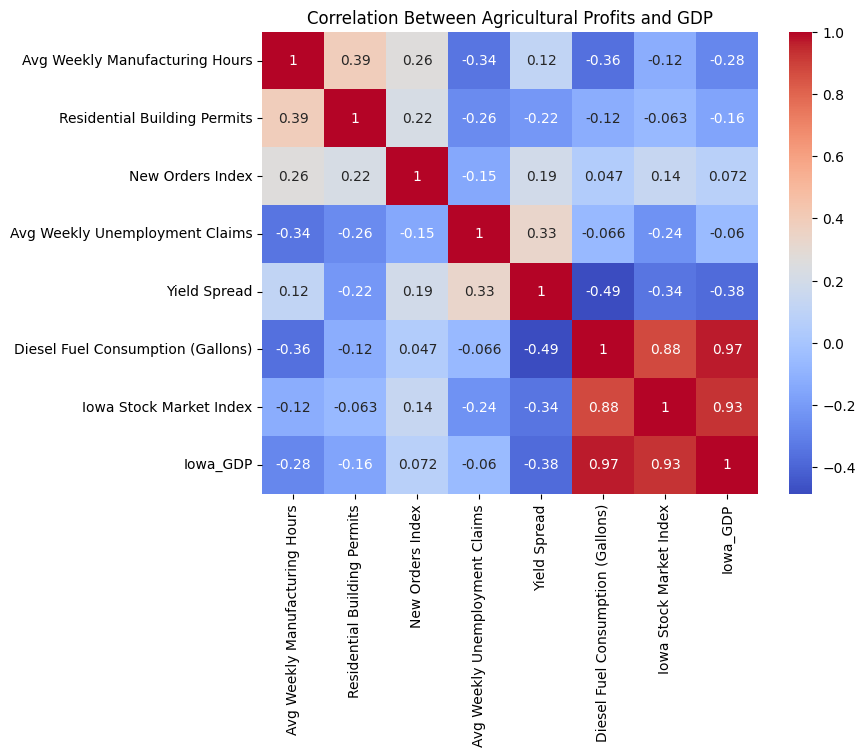

In [147]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df_combined[industry_cols + [target_col]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Agricultural Profits and GDP")
plt.show()

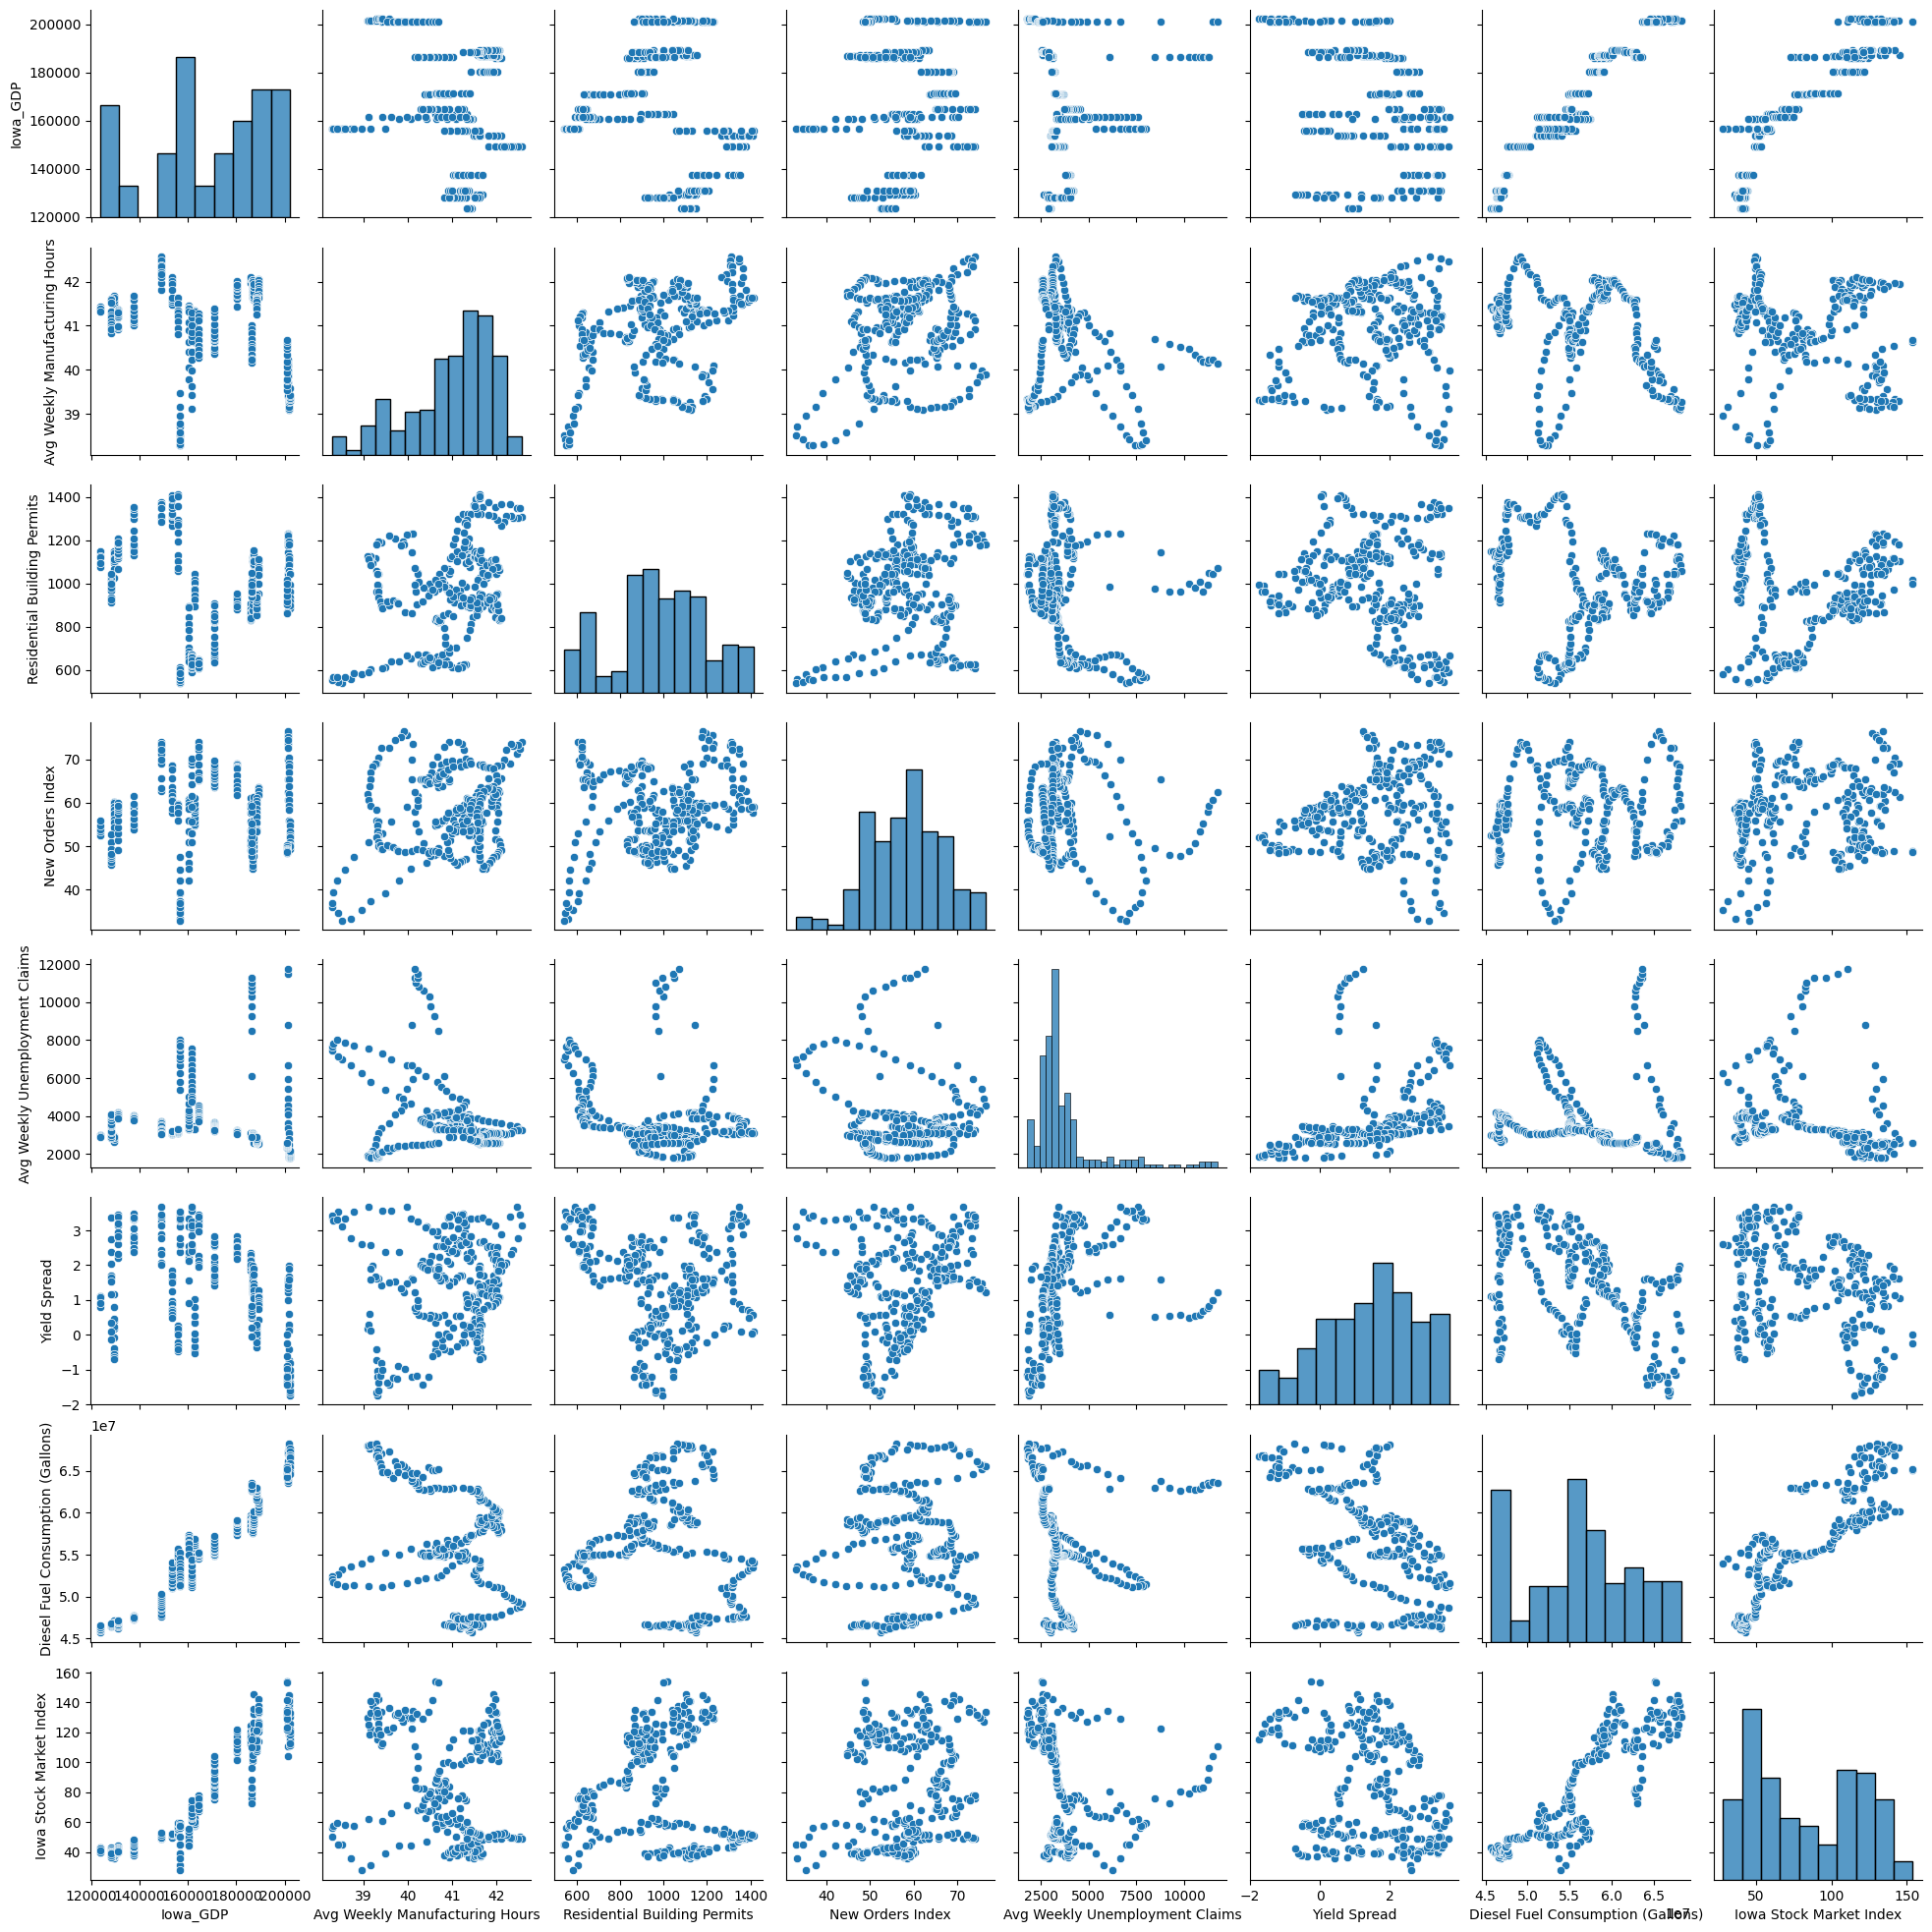

In [149]:
import seaborn as sns

sns.pairplot(df_combined[['Iowa_GDP', 'Avg Weekly Manufacturing Hours', 'Residential Building Permits',
       'New Orders Index', 'Avg Weekly Unemployment Claims', 'Yield Spread',
       'Diesel Fuel Consumption (Gallons)', 'Iowa Stock Market Index']])

### Focusing on Diesel Consumption and Iowa Stock Index

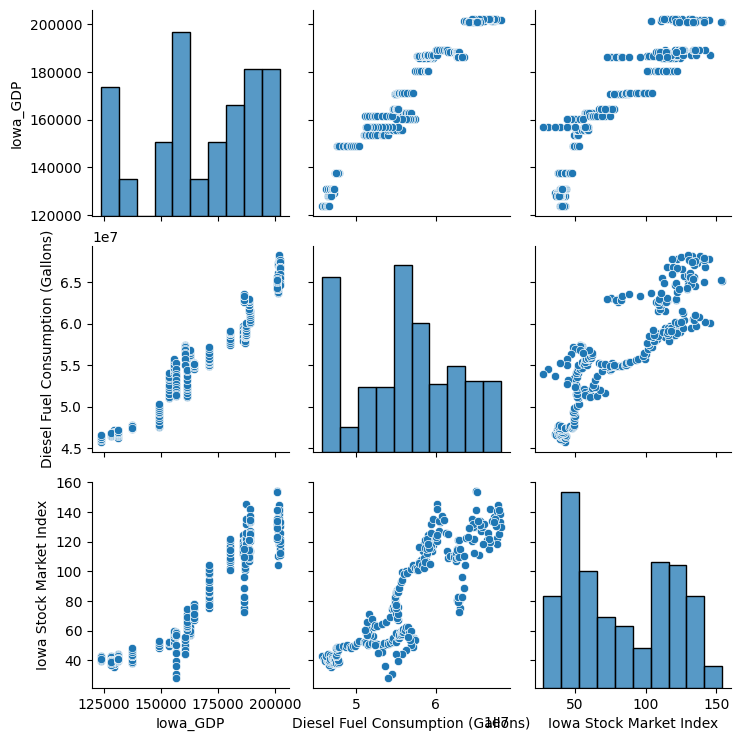

In [151]:
sns.pairplot(df_combined[['Iowa_GDP', 'Diesel Fuel Consumption (Gallons)', 'Iowa Stock Market Index']])

In [152]:
# Linear Regression
X = df_combined[industry_cols]
y = df_combined[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print("R^2 score on test set:", model.score(X_test, y_test))
print("Regression Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

R^2 score on test set: 0.9706018567691349
Regression Coefficients:
Avg Weekly Manufacturing Hours: 1266.4634
Residential Building Permits: -5.2625
New Orders Index: -31.0475
Avg Weekly Unemployment Claims: 0.8000
Yield Spread: 863.6911
Diesel Fuel Consumption (Gallons): 0.0025
Iowa Stock Market Index: 252.3203
